In [1]:

batch_size = 5000
lr = 0.0001
num_epoch = 500
number_of_features = 17
hyper_parameter1=128
hyper_parameter2=64
hyper_parameter3=32
hyper_parameter4=16


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split, DataLoader
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

# GPU OR CPU
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

GPU


In [4]:
class DataSet_Loader(Dataset):

    def __init__(self,data_set_path):
        df = pd.read_excel(data_set_path)
        # print(df.msg_cat.value_counts().sort_values().plot(kind = "barh"))
        # print(df['msg_cat'].value_counts())

        # # preprocceing
        df=df[['QTITTRAN','IANUTRAN','IGARTRANCHC','DHTRAN','CIDGRC','TDECOMP','ACAROMDENACKL_CIDADFEMET','ACAROMDENACKL_YCPTEOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_YOM','ACAROMDENACKL_IPRSQTITREST','ACAROMDENACKL_CIDITF','ACAROMDENACKL_PLIMSAIOM_QMT','INSTRUMENTID','PTRAN_QMT']]
        df['CIDGRC']=df['CIDGRC'].astype("string")
        df['ACAROMDENACKL_YPLIMSAIOM']=df['ACAROMDENACKL_YPLIMSAIOM'].astype("string")
        df['ACAROMDENACKL_YVALIOMNSC']=df['ACAROMDENACKL_YVALIOMNSC'].astype("string")
        df['ACAROMDENACKL_YOM']=df['ACAROMDENACKL_YOM'].astype("string")
        df['ACAROMDENACKL_CIDITF']=df['ACAROMDENACKL_CIDITF'].astype("string")
        df['INSTRUMENTID']=df['INSTRUMENTID'].astype("string")

        cols = ['CIDGRC' ,'ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_CIDITF','ACAROMDENACKL_YOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','INSTRUMENTID']
        df[cols] = df[cols].apply(LabelEncoder().fit_transform)

        self.data_array = df.values
        self.x = self.data_array[:, :17]
        self.y = self.data_array[:, 17]

        # normalaized data
        # scaler = preprocessing.StandardScaler().fit(self.x)
        # self.x = scaler.transform(self.x)

        # scaler1 = preprocessing.StandardScaler().fit(self.y)
        # self.y = scaler1.transform(self.y)

        self.x = torch.FloatTensor(self.x)
        self.y = torch.FloatTensor(self.y)

    def __len__(self):
        return len(self.data_array)

    def __getitem__(self, item):
        sample = (self.x[item, :], self.y[item])
        return sample

In [5]:
dataset_trades = DataSet_Loader("/content/drive/MyDrive/M1.xlsx")
number_of_test = int(len(dataset_trades)*0.3)
number_of_train = len(dataset_trades) - int(len(dataset_trades)*0.3)
train_trade ,test_trade = random_split(dataset=dataset_trades, lengths=[number_of_train,number_of_test])

train_trade_dataloader = DataLoader(dataset=train_trade ,batch_size=batch_size ,shuffle=True)
test_trade_dataloader = DataLoader(dataset=test_trade ,batch_size=batch_size ,shuffle=True)
dataset_trades.x

tensor([[6.0800e+02, 7.0000e+00, 1.0000e+00,  ..., 4.5000e+01, 4.1000e+03,
         2.6200e+02],
        [5.0000e+02, 7.0000e+00, 1.0000e+00,  ..., 4.7000e+01, 4.0000e+03,
         2.6200e+02],
        [3.9200e+02, 7.0000e+00, 1.0000e+00,  ..., 4.8000e+01, 4.5000e+03,
         2.6200e+02],
        ...,
        [2.0000e+03, 7.0000e+00, 1.0000e+00,  ..., 3.4000e+01, 1.6400e+06,
         1.7100e+02],
        [4.3390e+03, 7.0000e+00, 1.0000e+00,  ..., 1.8000e+01, 2.3020e+06,
         2.8200e+02],
        [1.0575e+04, 7.0000e+00, 1.0000e+00,  ..., 5.5000e+01, 5.3600e+04,
         2.5300e+02]])

In [6]:
dataset_trades.y

tensor([   3900.,    3900.,    3900.,  ..., 1640000., 2301000.,   53600.])

In [7]:
class Model_Nerual_FL(nn.Module):

    def __init__(self):
        super(Model_Nerual_FL, self).__init__()

        self.layers = nn.Sequential(
        nn.Linear(number_of_features, hyper_parameter1),
        nn.ReLU(),
        nn.Linear(hyper_parameter1, hyper_parameter2),
        nn.ReLU(),
        nn.Linear(hyper_parameter2, hyper_parameter3),
        nn.ReLU(),
        nn.Linear(hyper_parameter3, hyper_parameter4),
        nn.ReLU(),
        nn.Linear(hyper_parameter4,1)
        )

    def forward(self,x):
        return self.layers(x)

In [8]:
model_Nerual_FL = Model_Nerual_FL().to(device=device)
model_Nerual_FL

Model_Nerual_FL(
  (layers): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [9]:
global_model = Model_Nerual_FL().to(device=device)
optimizer = opt.Adam(global_model.parameters(), lr=lr)
loss_fn = nn.MSELoss()

Epoch [0/500], Loss: 123361351947723472896.0000
Epoch [50/500], Loss: 111461821385420046336.0000
Epoch [100/500], Loss: 105604740536443338752.0000
Epoch [150/500], Loss: 100554481319928659968.0000
Epoch [200/500], Loss: 95702415671390371840.0000
Epoch [250/500], Loss: 92108164936748761088.0000
Epoch [300/500], Loss: 89004797765397512192.0000
Epoch [350/500], Loss: 85994194191058468864.0000
Epoch [400/500], Loss: 83073328357731991552.0000
Epoch [450/500], Loss: 80232559747465740288.0000
Epoch [500/500], Loss: 77476928521561440256.0000


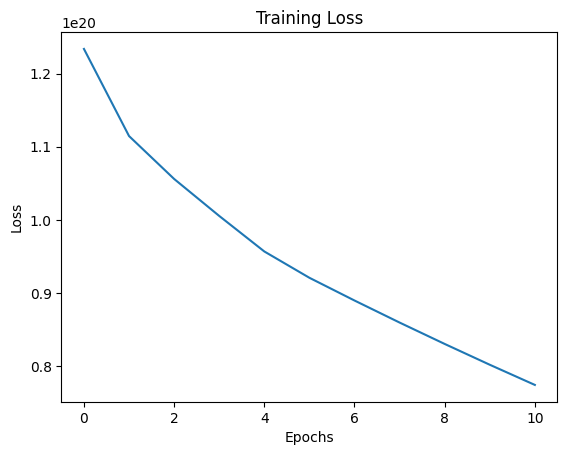

In [10]:
loss_plot = []

for epoch in range(num_epoch+1):
    for batch_x, batch_y in train_trade_dataloader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        batch_x, batch_y = batch_x.float(), batch_y.float().reshape((batch_y.shape[0], 1))


        output = global_model(batch_x)
        loss = loss_fn(output,batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print("Epoch [%d/%d], Loss: %.4f" % (epoch, num_epoch, loss.item()))
        loss_plot.append(loss.item())


plt.plot(range(len(loss_plot)), np.asarray(loss_plot))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [11]:

y_test, yhat = list(), list()


model_Nerual_FL.eval()  # Set the model to evaluation mode
total_correct = 0
total_samples = 0
# criterion = nn.BCEWithLogitsLoss()

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, targets in test_trade_dataloader:
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()

        outputs = global_model(inputs)
        test_loss = loss_fn(outputs, targets.reshape((targets.shape[0], 1)))
        print(f'Test Loss: {test_loss.item():.4f}')
        print('-------------------------')

Test Loss: 77420862224637886464.0000
-------------------------
